In [26]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
#load data
df = pd.read_csv("../data/raw/data.csv")

In [8]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [10]:
df.isnull().sum()


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [23]:
# Convert the TransactionStartTime column to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
# Check the data type of TransactionStartTime
df['TransactionStartTime'].dtype



datetime64[ns, UTC]

In [36]:
# Extract hour, weekday, day, and month
df['hour'] = df['TransactionStartTime'].dt.hour
df['dayofweek'] = df['TransactionStartTime'].dt.dayofweek  # 0 = Monday
df['day'] = df['TransactionStartTime'].dt.day
df['month'] = df['TransactionStartTime'].dt.month

# See a sample
df[['TransactionStartTime', 'hour', 'dayofweek', 'day', 'month']].head()

,TransactionStartTime,hour,dayofweek,day,month
0,2018-11-15 02:18:49+00:00,2,3,15,11
1,2018-11-15 02:19:08+00:00,2,3,15,11
2,2018-11-15 02:44:21+00:00,2,3,15,11
3,2018-11-15 03:32:55+00:00,3,3,15,11
4,2018-11-15 03:34:21+00:00,3,3,15,11


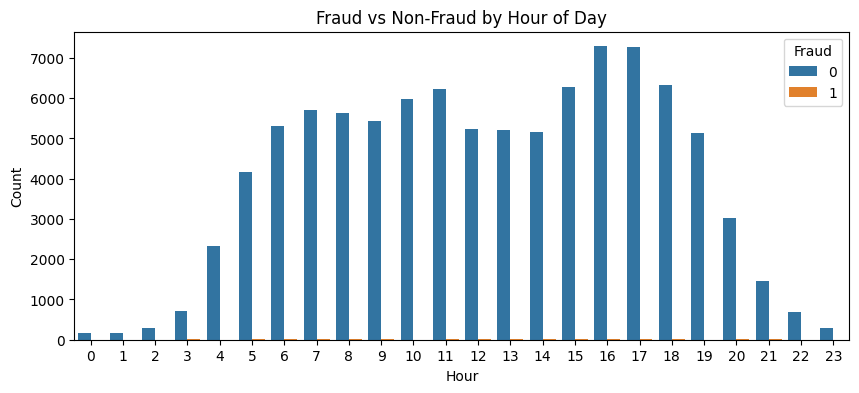

In [38]:
#visualize the distribution of fraud cases by hour of the day
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='hour', hue='FraudResult')
plt.title('Fraud vs Non-Fraud by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Fraud')
plt.show()


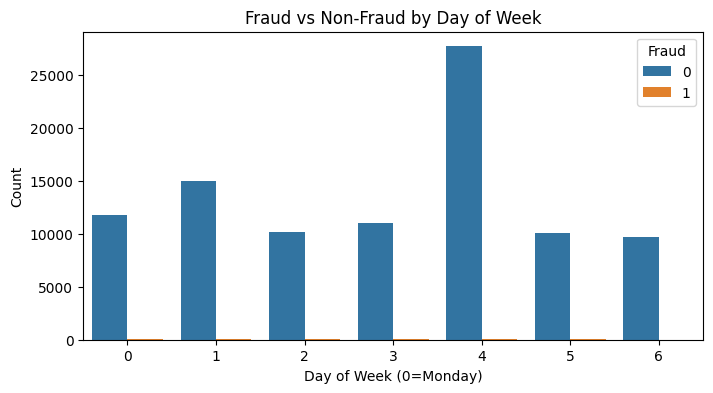

In [39]:
#visualize the distribution of fraud cases by day of the week
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='dayofweek', hue='FraudResult')
plt.title('Fraud vs Non-Fraud by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Count')
plt.legend(title='Fraud')
plt.show()


In [40]:
# Count values of FraudResult
df['FraudResult'].value_counts()


FraudResult
0    95469
1      193
Name: count, dtype: int64

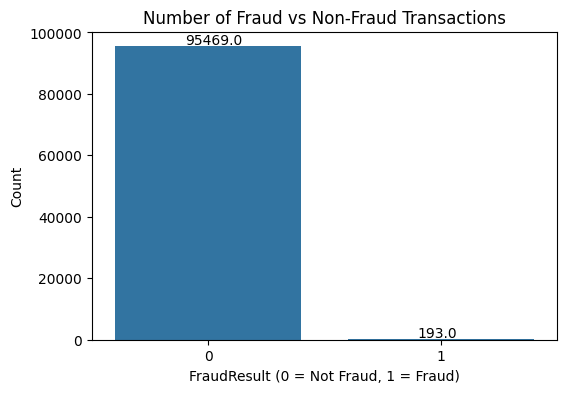

In [28]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='FraudResult')
plt.title('Number of Fraud vs Non-Fraud Transactions')
plt.xlabel('FraudResult (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count')

# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 500))

plt.show()

In [34]:
# Correlation (for numeric)
df.corr(numeric_only=True)

# Categorical to target relationship
pd.crosstab(df['ProductCategory'], df['FraudResult'], normalize='index')


FraudResult,0,1
ProductCategory,,
airtime,0.999600,0.000400
data_bundles,1.000000,0.000000
financial_services,0.996454,0.003546
movies,1.000000,0.000000
other,1.000000,0.000000
ticket,1.000000,0.000000
transport,0.920000,0.080000
tv,1.000000,0.000000
utility_bill,0.993750,0.006250


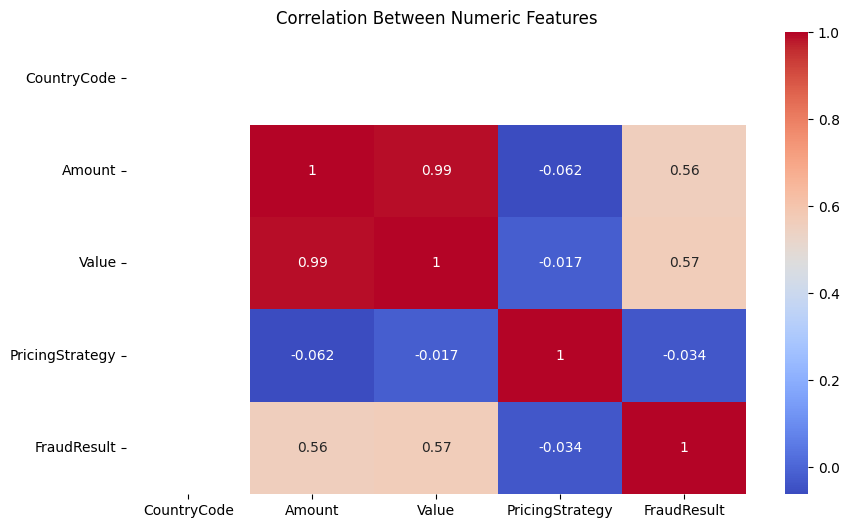

In [ ]:
# Only take numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Check correlations
correlation_matrix = numeric_cols.corr()

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()



In [13]:
df = pd.read_csv("../data/raw/Xente_Variable_Definitions.csv")
df.head()

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transacti...
2,AccountId,Unique number identifying the customer on plat...
3,SubscriptionId,Unique number identifying the customer subscri...
4,CustomerId,Unique identifier attached to Account


In [15]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Column Name  16 non-null     object
 1   Definition   16 non-null     object
dtypes: object(2)
memory usage: 388.0+ bytes


,Column Name,Definition
count,16,16
unique,16,16
top,TransactionId,Unique �transaction identifier on platform
freq,1,1


In [16]:
df.isnull().sum()

Column Name    0
Definition     0
dtype: int64

In [19]:
df.duplicated().sum()

np.int64(0)